In [14]:
# census API Key: 2c883bc405bc2938e2971f8c9e53ca3621331460
# Essex county FIPS = 34013
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 100)
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
import mapclassify as mc
from census import Census
from us import states

In [15]:
deeds = gpd.read_file("data/rtt_investors_rentals_flips.geojson")

In [16]:
deeds['count_field'] = 1
deeds['year'] = deeds['sort_year_x'].astype(str)

In [17]:
deeds['inst_inv_rental'] = np.where((deeds['classification'] == 'institutional investor rental'),1,0)
deeds['non_inst_inv_rental'] = np.where((deeds['classification'] == 'non institutional investor rental'),1, 0)
deeds['inst_inv_flip'] = np.where((deeds['classification'] == 'institutional investor flip'),1, 0)
deeds['non_inst_inv_flip'] = np.where((deeds['classification'] == 'non institutional investor flip'),1, 0)
deeds['non_inv'] = np.where((deeds['classification'] == 'non investor'),1, 0)

In [18]:
deeds = deeds[deeds['sort_year_x'] <= 2018]

In [19]:
total = deeds.groupby('year').agg({'count_field':'sum','inst_inv_rental':'sum','non_inst_inv_rental':'sum','inst_inv_flip':'sum','non_inst_inv_flip':'sum', 'non_inv':'sum'})
total['inst_inv_rental_per'] = (total['inst_inv_rental']/total['count_field'])
total['non_inst_inv_rental_per'] = (total['non_inst_inv_rental']/total['count_field'])
total['all_inv_rental'] = total['inst_inv_rental'] + total['non_inst_inv_rental']
total['inst_inv_flip_per'] = (total['inst_inv_flip']/total['count_field'])
total['non_inst_inv_flip_per'] = (total['non_inst_inv_flip']/total['count_field'])
total['all_inv_flip'] = total['inst_inv_flip'] + total['non_inst_inv_flip']
total['own_per'] = (total['non_inv']/total['count_field'])

In [20]:
total

,count_field,inst_inv_rental,non_inst_inv_rental,inst_inv_flip,non_inst_inv_flip,non_inv,inst_inv_rental_per,non_inst_inv_rental_per,all_inv_rental,inst_inv_flip_per,non_inst_inv_flip_per,all_inv_flip,own_per
year,,,,,,,,,,,,,
2000,23494,313,1133,107,457,21484,0.013323,0.048225,1446,0.004554,0.019452,564,0.914446
2001,24362,371,1379,237,704,21671,0.015229,0.056605,1750,0.009728,0.028897,941,0.889541
2002,25880,496,1438,310,1118,22518,0.019165,0.055564,1934,0.011978,0.043199,1428,0.870093
2003,27790,538,1660,462,1078,24052,0.019359,0.059734,2198,0.016625,0.038791,1540,0.865491
2004,31706,644,2162,571,1412,26917,0.020312,0.068189,2806,0.018009,0.044534,1983,0.848956
2005,34731,916,2368,744,1572,29131,0.026374,0.068181,3284,0.021422,0.045262,2316,0.838761
2006,31560,891,1944,751,1367,26607,0.028232,0.061597,2835,0.023796,0.043314,2118,0.843061
2007,26826,964,1620,622,929,22691,0.035935,0.060389,2584,0.023186,0.034631,1551,0.845858
2008,20017,854,1292,576,624,16671,0.042664,0.064545,2146,0.028776,0.031174,1200,0.832842


<BarContainer object of 19 artists>

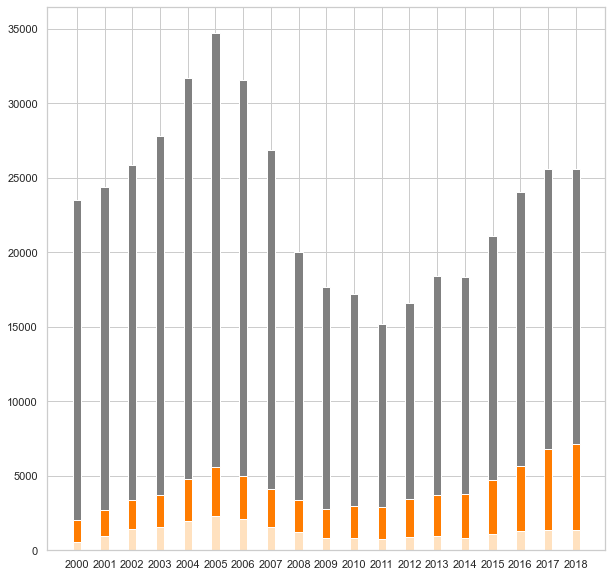

In [21]:
total_bar = total.reset_index()
f, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.set(style="white")

plt.bar(data=total_bar, x='year', height='non_inv',label='Owner Occupants', color='grey', width=.3, bottom = total_bar['all_inv_rental']+total_bar['all_inv_flip'])
plt.bar(data=total_bar, x='year', height='all_inv_rental',label='Single Family Rentals', color='#FF7C00', width=.3, bottom = total_bar['all_inv_flip'])
plt.bar(data=total_bar, x='year', height='all_inv_flip',label='Flips', color='#FFE1BF', width=.3)

## Census gathering of data

In [22]:
c = Census("2c883bc405bc2938e2971f8c9e53ca3621331460")

In [23]:
c.acs5.tables(year=2012)

[{'name': 'B17015',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B17015.json'},
 {'name': 'B18104',
  'description': 'SEX BY AGE BY COGNITIVE DIFFICULTY',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B18104.json'},
 {'name': 'B17016',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B17016.json'},
 {'name': 'B18105',
  'description': 'SEX BY AGE BY AMBULATORY DIFFICULTY',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B18105.json'},
 {'name': 'B17017',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/gro

In [24]:
# 2012 ACS 5 year
poverty_income_2012 = c.acs5.get(("B17001_001E","B17001_002E","B19013_001E"),geo={'for':'tract:*','in':'state:{} county:101'.format(states.PA.fips)},year=2012)
# 2010 SF1
pop_race_housing_2010 = c.sf1.get(("P006001",'P006002','P006003','H004001','H004004','H003001','H003003'),geo={'for':'tract:*','in':'state:{} county:101'.format(states.PA.fips)},year=2010)
 # 2000 SF1
#pop_race_housing_2000 = c.sf1.get(("P009001",'P009002','P009003','H004001','H004003','H003001','H003003'),geo={'for':'tract:*',
 #                                       'in':'state:{} county:101'.format(states.PA.fips)},year=2000)

# 2000 SF3
#poverty_income_2000 = c.sf3.get(("P087001",'P087002','P053001'),geo={'for':'tract:*',
 #                                       'in':'state:{} county:101'.format(states.PA.fips)},year=2000)

In [25]:
# converting all dictionaries (format on download) to dataframes
poverty_income_2012_pd = pd.DataFrame(poverty_income_2012)
pop_race_housing_2010_pd = pd.DataFrame(pop_race_housing_2010)
#pop_race_housing_2000_pd = pd.DataFrame(pop_race_housing_2000)
#poverty_income_2000_pd = pd.DataFrame(poverty_income_2000)

In [26]:
# defining columns names with descriptive headers
#sf32000_cols = {'P087001':'pop_tot_pov','P087002':'in_poverty','P053001':'median_hh'}
#sf12000_cols = {'P009001':'pop_tot_race','P009002':'white_tot','P009003':'black_tot',
#                'H004001':'housing_units_occ','H004003':'housing_renters',
#                'H003001':'housing_units_tot','H003003':'housing_units_vac'}

acs2012_cols = {'B17001_001E':'pop_tot_pov','B17001_002E':'in_poverty','B19013_001E':'median_hh'}
sf12010_cols = {'P006001':'pop_tot_race','P006002':'white_tot','P006003':'black_tot',
                'H004001':'housing_units_occ','H004004':'housing_renters',
                'H003001':'housing_units_tot','H003003':'housing_units_vac'}

In [27]:
poverty_income_2012_pd = poverty_income_2012_pd.rename(columns = acs2012_cols)
pop_race_housing_2010_pd = pop_race_housing_2010_pd.rename(columns =sf12010_cols)
#pop_race_housing_2000_pd = pop_race_housing_2000_pd.rename(columns=sf12000_cols)
#poverty_income_2000_pd = poverty_income_2000_pd.rename(columns = sf32000_cols)

In [28]:
poverty_income_2012_pd['median_hh'] = poverty_income_2012_pd.apply(
    lambda x: 1 if x['median_hh']==-666666666.0 else x['median_hh'],axis=1)

In [29]:
#stats2000 = pop_race_housing_2000_pd.merge(poverty_income_2000_pd,how="left",left_on='tract', right_on='tract')
stats2010 = pop_race_housing_2010_pd.merge(poverty_income_2012_pd, how="left",left_on='tract',right_on='tract')

In [30]:
# creating geoID fields 
#stats2000['STFID']=stats2000["state_x"].astype(str) + stats2000[
#    "county_x"].astype(str) + stats2000["tract"].astype(str)
stats2010['GEOID']=stats2010["state_x"].astype(str) + stats2010[
    "county_x"].astype(str) + stats2010["tract"].astype(str)



In [31]:
stats2010 = stats2010.drop(columns=['state_x','state_y','county_x','county_y','tract'])
#stats2000 = stats2000.drop(columns=['state_x','state_y','county_x','county_y','tract'])

In [32]:
# calculating percentages

#stats2000['per_white'] = stats2000['white_tot'].astype('int64')/stats2000['pop_tot_race'].astype('int64')
#stats2000['per_black']= stats2000['black_tot'].astype('int64')/stats2000['pop_tot_race'].astype('int64')
#stats2000['per_renters'] = stats2000['housing_renters'].astype('int64')/stats2000['housing_units_occ'].astype('int64')
#stats2000['per_vacant']= stats2000['housing_units_vac'].astype('int64')/stats2000['housing_units_tot'].astype('int64')
#stats2000['per_poverty']= stats2000['in_poverty'].astype('int64')/stats2000['pop_tot_pov'].astype('int64')

stats2010['per_white'] = stats2010['white_tot'].astype('int64')/stats2010['pop_tot_race'].astype('int64')
stats2010['per_black']= stats2010['black_tot'].astype('int64')/stats2010['pop_tot_race'].astype('int64')
stats2010['per_renters'] = stats2010['housing_renters'].astype('int64')/stats2010['housing_units_occ'].astype('int64')
stats2010['per_vacant']= stats2010['housing_units_vac'].astype('int64')/stats2010['housing_units_tot'].astype('int64')
stats2010['per_poverty']= stats2010['in_poverty'].astype('int64')/stats2010['pop_tot_pov'].astype('int64')


In [33]:
stats2010.head()

,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,GEOID,per_white,per_black,per_renters,per_vacant,per_poverty
0,3562.0,3038.0,233.0,2301.0,1483.0,2696.0,395.0,3183.0,484.0,75505.0,42101000100,0.852892,0.065413,0.644502,0.146513,0.152058
1,2989.0,746.0,316.0,1145.0,781.0,1285.0,140.0,1877.0,227.0,49928.0,42101000200,0.249582,0.105721,0.682096,0.108949,0.120938
2,3262.0,2466.0,347.0,1855.0,1402.0,1968.0,113.0,3136.0,438.0,71250.0,42101000300,0.755978,0.106376,0.755795,0.057419,0.139668
3,2201.0,1174.0,407.0,1584.0,1240.0,1790.0,206.0,2287.0,630.0,30000.0,42101000401,0.533394,0.184916,0.782828,0.115084,0.275470
4,3184.0,2569.0,182.0,2273.0,887.0,2709.0,436.0,3021.0,406.0,44805.0,42101000402,0.806847,0.057161,0.390233,0.160945,0.134393


In [34]:
# loading morans hh counts
morans_hh_0010 = gpd.read_file("data/morans_hh_d_blocks_0010.geojson")
morans_hh_1018 = gpd.read_file("data/morans_hh_d_blocks_1018.geojson")


In [35]:
tracts = gpd.read_file('data/02_flip-investigations_data/philadelphia/Census_Tracts_2010.geojson')

In [36]:
tracts = tracts.to_crs('epsg:2272')

In [37]:
morans_hh_0010_sel = morans_hh_0010[['inst_inv_rent_00_06','inst_inv_rent_07_09',
                           'non_inst_inv_rent_00_06','non_inst_inv_rent_07_09',
                           'inst_inv_flip_00_06','inst_inv_flip_07_09',
                           'non_inst_inv_flip_00_06','non_inst_inv_flip_07_09',
                           'non_inv_00_06','non_inv_07_09',
                           'inv_00_06', 'inv_07_09', 
                           'inst_inv_00_06', 'inst_inv_07_09',  
                           'single_inv_00_06', 'single_inv_07_09', 
                           'overlapA_00_06', 'overlapA_07_09', 
                           'overlapB_00_06', 'overlapB_07_09', 
                           'geometry']].copy()
morans_hh_1018_sel = morans_hh_1018[['inst_inv_rent_10_13','non_inst_inv_rent_10_13','inst_inv_flip_10_13',
                                    'non_inst_inv_flip_10_13','non_inv_10_13','inst_inv_10_13',
                                    'inv_10_13','single_inv_10_13','overlapA_10_13','overlapB_10_13',
                                     'inst_inv_rent_14_18','non_inst_inv_rent_14_18','inst_inv_flip_14_18',
                                    'non_inst_inv_flip_14_18','non_inv_14_18','inst_inv_14_18',
                                    'inv_14_18','single_inv_14_18','overlapA_14_18','overlapB_14_18','geometry']].copy()

In [38]:
tract_summary0010 = gpd.sjoin(tracts, morans_hh_0010_sel, how='left', op='intersects')
tract_summary1018 = gpd.sjoin(tracts, morans_hh_1018_sel, how='left', op='intersects')

In [39]:
hh_tracts0010 = tract_summary0010.groupby('GEOID10').agg({'inst_inv_rent_00_06':'max', 'inst_inv_rent_07_09':'max',
                                                          'non_inst_inv_rent_00_06':'max','non_inst_inv_rent_07_09':'max',
                                                          'inst_inv_flip_00_06':'max','inst_inv_flip_07_09':'max',
                                                          'non_inst_inv_flip_00_06':'max','non_inst_inv_flip_07_09':'max',
                                                          'non_inv_00_06':'max','non_inv_07_09':'max',
                                                          'inv_00_06':'max', 'inv_07_09':'max', 
                                                          'inst_inv_00_06':'max', 'inst_inv_07_09':'max',  
                                                          'single_inv_00_06':'max', 'single_inv_07_09':'max', 
                                                          'overlapA_00_06':'max', 'overlapA_07_09':'max', 
                                                          'overlapB_00_06':'max', 'overlapB_07_09':'max'})
hh_tracts1018 = tract_summary1018.groupby('GEOID10').agg({'inst_inv_rent_10_13':'max','non_inst_inv_rent_10_13':'max',
                                    'inst_inv_flip_10_13':'max','non_inst_inv_flip_10_13':'max','non_inv_10_13':'max',
                                    'inst_inv_10_13':'max','inv_10_13':'max','single_inv_10_13':'max',
                                    'overlapA_10_13':'max','overlapB_10_13':'max',
                                                         'inst_inv_rent_14_18':'max','non_inst_inv_rent_14_18':'max',
                                    'inst_inv_flip_14_18':'max','non_inst_inv_flip_14_18':'max','non_inv_14_18':'max',
                                    'inst_inv_14_18':'max','inv_14_18':'max','single_inv_14_18':'max',
                                    'overlapA_14_18':'max','overlapB_14_18':'max'})

In [40]:
# joining stats to tracts with morans results files based on geo ids
morans_hh_0010_census = hh_tracts0010.merge(stats2010, how='left', left_on='GEOID10', right_on='GEOID').reset_index()
morans_hh_1018_census = hh_tracts1018.merge(stats2010, how='left', left_on='GEOID10', right_on='GEOID').reset_index()

In [41]:
# converting median hh to integer, data type issue
morans_hh_0010_census['median_hh'] = morans_hh_0010_census['median_hh'].astype('int64')
morans_hh_1018_census['median_hh'] = morans_hh_1018_census['median_hh'].astype('int64')

In [42]:
#institutional investor rentals
inst_inv_r_sum_00_06 = morans_hh_0010_census.groupby("inst_inv_rent_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_07_09 = morans_hh_0010_census.groupby("inst_inv_rent_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_10_13 = morans_hh_1018_census.groupby("inst_inv_rent_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_r_sum_14_18 = morans_hh_1018_census.groupby("inst_inv_rent_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})


In [43]:
#non institutional investor rentals
non_inst_inv_r_sum_00_06 = morans_hh_0010_census.groupby("non_inst_inv_rent_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_07_09 = morans_hh_0010_census.groupby("non_inst_inv_rent_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_10_13 = morans_hh_1018_census.groupby("non_inst_inv_rent_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_r_sum_14_18 = morans_hh_1018_census.groupby("non_inst_inv_rent_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})


In [44]:
#institutional investor flips
inst_inv_f_sum_00_06 = morans_hh_0010_census.groupby("inst_inv_flip_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_07_09 = morans_hh_0010_census.groupby("non_inst_inv_flip_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_10_13 = morans_hh_1018_census.groupby("non_inst_inv_flip_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_f_sum_14_18 = morans_hh_1018_census.groupby("non_inst_inv_flip_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [45]:
#institutional investor flips
non_inst_inv_f_sum_00_06 = morans_hh_0010_census.groupby("inst_inv_flip_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_07_09 = morans_hh_0010_census.groupby("non_inst_inv_flip_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_10_13 = morans_hh_1018_census.groupby("non_inst_inv_flip_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inst_inv_f_sum_14_18 = morans_hh_1018_census.groupby("non_inst_inv_flip_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})


In [46]:
#non investors/owner occupants
non_inv_sum_00_06 = morans_hh_0010_census.groupby("non_inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_07_09 = morans_hh_0010_census.groupby("non_inv_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_10_13 = morans_hh_1018_census.groupby("non_inv_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
non_inv_sum_14_18 = morans_hh_1018_census.groupby("non_inv_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [47]:
#all investors
inv_sum_00_06 = morans_hh_0010_census.groupby("inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inv_sum_07_09 = morans_hh_0010_census.groupby("inv_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inv_sum_10_13 = morans_hh_1018_census.groupby("inv_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inv_sum_14_18 = morans_hh_1018_census.groupby("inv_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [48]:
#single investors
single_inv_sum_00_06 = morans_hh_0010_census.groupby("single_inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
single_inv_sum_07_09 = morans_hh_0010_census.groupby("single_inv_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
single_inv_sum_10_13 = morans_hh_1018_census.groupby("single_inv_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
single_inv_sum_14_18 = morans_hh_1018_census.groupby("single_inv_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [49]:
#all institutional investors
inst_inv_sum_00_06 = morans_hh_0010_census.groupby("inst_inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_sum_07_09 = morans_hh_0010_census.groupby("inst_inv_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_sum_10_13 = morans_hh_1018_census.groupby("inst_inv_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
inst_inv_sum_14_18 = morans_hh_1018_census.groupby("inst_inv_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [50]:
#overlapA all investors vs. owner occupants
overlapA_sum_00_06 = morans_hh_0010_census.groupby("overlapA_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
overlapA_sum_07_09 = morans_hh_0010_census.groupby("overlapA_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
overlapA_sum_10_13 = morans_hh_1018_census.groupby("overlapA_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
overlapA_sum_14_18 = morans_hh_1018_census.groupby("overlapA_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [51]:
#overlapB inst investors vs. single investors
overlapB_sum_00_06 = morans_hh_0010_census.groupby("overlapB_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
overlapB_sum_07_09 = morans_hh_0010_census.groupby("overlapB_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
overlapB_sum_10_13 = morans_hh_1018_census.groupby("overlapB_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})
overlapB_sum_14_18 = morans_hh_1018_census.groupby("overlapB_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [52]:
summary_census_stats = pd.concat([inst_inv_r_sum_00_06,inst_inv_r_sum_07_09,inst_inv_r_sum_10_13,inst_inv_r_sum_14_18,
                                               non_inst_inv_r_sum_00_06,non_inst_inv_r_sum_07_09,non_inst_inv_r_sum_10_13,non_inst_inv_r_sum_14_18,
                                               inst_inv_f_sum_00_06,inst_inv_f_sum_07_09,inst_inv_f_sum_10_13,inst_inv_f_sum_14_18,
                                               non_inst_inv_f_sum_00_06,non_inst_inv_f_sum_07_09,non_inst_inv_f_sum_10_13,non_inst_inv_f_sum_14_18,
                                               non_inv_sum_00_06,non_inv_sum_07_09,non_inv_sum_10_13,non_inv_sum_14_18,
                                               inv_sum_00_06, inv_sum_07_09, inv_sum_10_13,inv_sum_14_18,
                                               single_inv_sum_00_06,single_inv_sum_07_09,single_inv_sum_10_13,single_inv_sum_14_18,
                                               inst_inv_sum_00_06,inst_inv_sum_07_09,inst_inv_sum_10_13,inst_inv_sum_14_18,
                                               overlapA_sum_00_06,overlapA_sum_07_09,overlapA_sum_10_13,overlapA_sum_14_18,
                                               overlapB_sum_00_06,overlapB_sum_07_09,overlapB_sum_10_13, overlapB_sum_14_18],
                                              keys = ['inst_inv_r_sum_00_06','inst_inv_r_sum_07_09','inst_inv_r_sum_10_13','inst_inv_r_sum_14_18',
                                               'non_inst_inv_r_sum_00_06','non_inst_inv_r_sum_07_09','non_inst_inv_r_sum_10_13','non_inst_inv_r_sum_14_18',
                                               'inst_inv_f_sum_00_06','inst_inv_f_sum_07_09','inst_inv_f_sum_10_13','inst_inv_f_sum_14_18',
                                               'non_inst_inv_f_sum_00_06','non_inst_inv_f_sum_07_09','non_inst_inv_f_sum_10_13','non_inst_inv_f_sum_14_18',
                                               'non_inv_sum_00_06','non_inv_sum_07_09','non_inv_sum_10_13','non_inv_sum_14_18',
                                               'inv_sum_00_06', 'inv_sum_07_09', 'inv_sum_10_13','inv_sum_14_18',
                                               'single_inv_sum_00_06','single_inv_sum_07_09','single_inv_sum_10_13','single_inv_sum_14_18',
                                               'inst_inv_sum_00_06','inst_inv_sum_07_09','inst_inv_sum_10_13','inst_inv_sum_14_18',
                                               'overlapA_sum_00_06','overlapA_sum_07_09','overlapA_sum_10_13','overlapA_sum_14_18',
                                               'overlapB_sum_00_06','overlapB_sum_07_09','overlapB_sum_10_13','overlapB_sum_14_18'])

In [53]:
summary_census_stats

per_white           per_black           per_renters  \
                            mean       std      mean       std        mean   
inst_inv_r_sum_00_06 0  0.427731  0.353198  0.463497  0.380546    0.421032   
                     1  0.416689  0.303106  0.426812  0.325133    0.520039   
inst_inv_r_sum_07_09 0  0.482766  0.329317  0.383041  0.345166    0.442655   
                     1  0.309145  0.290044  0.554856  0.336332    0.534969   
inst_inv_r_sum_10_13 0  0.465782  0.333743  0.401926  0.352868    0.427674   
...                          ...       ...       ...       ...         ...   
overlapB_sum_07_09   1  0.339486  0.293365  0.513011  0.334068    0.522619   
overlapB_sum_10_13   0  0.404509  0.328798  0.462008  0.363689    0.467363   
                     1  0.459100  0.319308  0.403149  0.320748    0.491638   
overlapB_sum_14_18   0  0.396482  0.333974  0.471808  0.364525    0.477269   
                     1  0.472744  0.305481  0.386118  0.316824    0.470264   

                                 per_vacant           per_poverty            \
                             std       mean       std        mean       std   
inst_inv_r_sum_00_06 0  0.202981   0.096558  0.082707    0.225508  0.147216   
                     1  0.173957   0.114321  0.054111    0.293843  0.163768   
inst_inv_r_sum_07_09 0  0.205358   0.093651  0.073276    0.223184  0.138793   
                     1  0.154065   0.129603  0.053432    0.334774  0.170834   
inst_inv_r_sum_10_13 0  0.196372   0.088783  0.074325    0.205836  0.124527   
...                          ...        ...       ...         ...       ...   
overlapB_sum_07_09   1  0.150391   0.129388  0.057190    0.331817  0.176067   
overlapB_sum_10_13   0  0.209443   0.100143  0.074697    0.250296  0.147466   
                     1  0.153788   0.119593  0.052709    0.290060  0.181828   
overlapB_sum_14_18   0  0.207388   0.105906  0.074772    0.254057  0.148603   
                     1  0.163519   0.106904  0.056031    0.280359  0.179778   

                           median_hh                
                                mean           std  
inst_inv_r_sum_00_06 0  41914.405714  21344.359519  
                     1  37335.846890  21109.302635  
inst_inv_r_sum_07_09 0  42797.692000  20842.763565  
                     1  33125.298507  20814.389583  
inst_inv_r_sum_10_13 0  43966.844037  20992.000385  
...                              ...           ...  
overlapB_sum_07_09   1  35062.562044  22477.644840  
overlapB_sum_10_13   0  39179.261364  19194.023973  
                     1  39957.400000  25439.221680  
overlapB_sum_14_18   0  38671.678295  20423.219410  
                     1  40959.682540  23032.734204  

[79 rows x 12 columns]

In [54]:
morans_hh_0010_census

,index,inst_inv_rent_00_06,inst_inv_rent_07_09,non_inst_inv_rent_00_06,non_inst_inv_rent_07_09,inst_inv_flip_00_06,inst_inv_flip_07_09,non_inst_inv_flip_00_06,non_inst_inv_flip_07_09,non_inv_00_06,non_inv_07_09,inv_00_06,inv_07_09,inst_inv_00_06,inst_inv_07_09,single_inv_00_06,single_inv_07_09,overlapA_00_06,overlapA_07_09,overlapB_00_06,overlapB_07_09,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,GEOID,per_white,per_black,per_renters,per_vacant,per_poverty
0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,3562.0,3038.0,233.0,2301.0,1483.0,2696.0,395.0,3183.0,484.0,75505,42101000100,0.852892,0.065413,0.644502,0.146513,0.152058
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2989.0,746.0,316.0,1145.0,781.0,1285.0,140.0,1877.0,227.0,49928,42101000200,0.249582,0.105721,0.682096,0.108949,0.120938
2,2,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,3262.0,2466.0,347.0,1855.0,1402.0,1968.0,113.0,3136.0,438.0,71250,42101000300,0.755978,0.106376,0.755795,0.057419,0.139668
3,3,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,2201.0,1174.0,407.0,1584.0,1240.0,1790.0,206.0,2287.0,630.0,30000,42101000401,0.533394,0.184916,0.782828,0.115084,0.275470
4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3184.0,2569.0,182.0,2273.0,887.0,2709.0,436.0,3021.0,406.0,44805,42101000402,0.806847,0.057161,0.390233,0.160945,0.134393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,42101980600,NaN,NaN,NaN,NaN,NaN
380,380,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,5.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1,42101980700,0.000000,0.800000,1.000000,0.000000,NaN
381,381,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,11.0,5.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,1,42101980800,0.454545,0.181818,0.750000,0.000000,NaN
382,382,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,31.0,9.0,21.0,19.0,17.0,20.0,1.0,4.0,0.0,1,42101980900,0.290323,0.677419,0.894737,0.050000,0.000000


In [55]:
morans_hh_0010_census_sub = morans_hh_0010_census[['GEOID', 'inst_inv_rent_00_06','inst_inv_rent_07_09',
                           'non_inst_inv_rent_00_06','non_inst_inv_rent_07_09',
                           'inst_inv_flip_00_06','inst_inv_flip_07_09',
                           'non_inst_inv_flip_00_06','non_inst_inv_flip_07_09',
                           'non_inv_00_06','non_inv_07_09',
                           'inv_00_06', 'inv_07_09',
                           'inst_inv_00_06', 'inst_inv_07_09', 
                           'single_inv_00_06', 'single_inv_07_09', 
                           'overlapA_00_06', 'overlapA_07_09', 
                           'overlapB_00_06', 'overlapB_07_09', 
                           'per_white', 'per_black', 
                           'per_renters', 'per_vacant',
                           'per_poverty','median_hh']]
morans_hh_1018_census_sub = morans_hh_1018_census[['GEOID','inst_inv_rent_10_13', 'non_inst_inv_rent_10_13',
                                                  'inst_inv_flip_10_13','non_inst_inv_flip_10_13','non_inv_10_13',
                                                   'inv_10_13','inst_inv_10_13', 'single_inv_10_13','overlapA_10_13','overlapB_10_13',
                                                   'inst_inv_rent_14_18', 'non_inst_inv_rent_14_18',
                                                  'inst_inv_flip_14_18','non_inst_inv_flip_14_18','non_inv_14_18',
                                                   'inv_14_18','inst_inv_14_18', 'single_inv_14_18','overlapA_14_18',
                                                  'overlapB_14_18','per_white', 'per_black', 
                                                   'per_renters', 'per_vacant',
                                                   'per_poverty','median_hh']]

In [56]:
# joining stats to tracts with morans results files based on geo ids
morans_hh_0010_census_nogroup = tract_summary0010.merge(stats2010, how = "left",
                                            left_on="GEOID10",right_on="GEOID").reset_index()
morans_hh_1018_census_nogroup = tract_summary1018.merge(stats2010, how = "left",
                                            left_on="GEOID10",right_on="GEOID").reset_index()

In [57]:
morans_hh_0010_census_sub = morans_hh_0010_census_nogroup[['GEOID', 'inst_inv_rent_00_06','inst_inv_rent_07_09',
                           'non_inst_inv_rent_00_06','non_inst_inv_rent_07_09',
                           'inst_inv_flip_00_06','inst_inv_flip_07_09',
                           'non_inst_inv_flip_00_06','non_inst_inv_flip_07_09',
                           'non_inv_00_06','non_inv_07_09',
                           'inv_00_06', 'inv_07_09',
                           'inst_inv_00_06', 'inst_inv_07_09', 
                           'single_inv_00_06', 'single_inv_07_09', 
                           'overlapA_00_06', 'overlapA_07_09', 
                           'overlapB_00_06', 'overlapB_07_09', 
                           'per_white', 'per_black', 
                           'per_renters', 'per_vacant',
                           'per_poverty','median_hh']]
morans_hh_1018_census_sub = morans_hh_1018_census_nogroup[['GEOID','inst_inv_rent_10_13', 'non_inst_inv_rent_10_13',
                                                  'inst_inv_flip_10_13','non_inst_inv_flip_10_13','non_inv_10_13',
                                                   'inv_10_13','inst_inv_10_13', 'single_inv_10_13','overlapA_10_13',
                                                  'overlapB_10_13',
                                                           'inst_inv_rent_14_18', 'non_inst_inv_rent_14_18',
                                                  'inst_inv_flip_14_18','non_inst_inv_flip_14_18','non_inv_14_18',
                                                   'inv_14_18','inst_inv_14_18', 'single_inv_14_18','overlapA_14_18',
                                                  'overlapB_14_18', 'per_white', 'per_black', 
                                                   'per_renters', 'per_vacant',
                                                   'per_poverty','median_hh']]

In [58]:
morans_hh_0010_census_sub['median_hh'] = morans_hh_0010_census_sub['median_hh'].astype('int64')
morans_hh_1018_census_sub['median_hh'] = morans_hh_1018_census_sub['median_hh'].astype('int64')

C:\Users\dmcna\anaconda3\envs\geo-2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dmcna\anaconda3\envs\geo-2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
morans_hh_0010_census_sub = morans_hh_0010_census_sub.set_index('GEOID')
morans_hh_1018_census_sub = morans_hh_1018_census_sub.set_index('GEOID')

In [60]:
inst_inv_rent_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_00_06']==1)].copy()
inst_inv_rent_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_07_09']==1)].copy()
inst_inv_rent_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_10_13']==1)].copy()
inst_inv_rent_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_14_18']==1)].copy()

non_inst_inv_rent_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_00_06']==1)].copy()
non_inst_inv_rent_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_07_09']==1)].copy()
non_inst_inv_rent_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_10_13']==1)].copy()
non_inst_inv_rent_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_14_18']==1)].copy()

inst_inv_flip_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_00_06']==1)].copy()
inst_inv_flip_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_07_09']==1)].copy()
inst_inv_flip_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_10_13']==1)].copy()
inst_inv_flip_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_14_18']==1)].copy()

non_inst_inv_flip_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_00_06']==1)].copy()
non_inst_inv_flip_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_rent_07_09']==1)].copy()
non_inst_inv_flip_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_10_13']==1)].copy()
non_inst_inv_flip_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_rent_14_18']==1)].copy()

non_inv_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['non_inv_00_06']==1)].copy()
non_inv_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['non_inv_07_09']==1)].copy()
non_inv_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['non_inv_10_13']==1)].copy()
non_inv_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['non_inv_14_18']==1)].copy()

inv_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inv_00_06']==1)].copy()
inv_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inv_07_09']==1)].copy()
inv_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inv_10_13']==1)].copy()
inv_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inv_14_18']==1)].copy()

inst_inv_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_00_06']==1)].copy()
inst_inv_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inst_inv_07_09']==1)].copy()
inst_inv_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_10_13']==1)].copy()
inst_inv_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inst_inv_14_18']==1)].copy()

single_inv_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['single_inv_00_06']==1)].copy()
single_inv_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['single_inv_07_09']==1)].copy()
single_inv_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['single_inv_10_13']==1)].copy()
single_inv_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['single_inv_14_18']==1)].copy()

overlapA_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['overlapA_00_06']==1)].copy()
overlapA_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['overlapA_07_09']==1)].copy()
overlapA_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['overlapA_10_13']==1)].copy()
overlapA_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['overlapA_14_18']==1)].copy()

overlapB_00_06 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['overlapB_00_06']==1)].copy()
overlapB_07_09 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['overlapB_07_09']==1)].copy()
overlapB_10_13 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['overlapB_10_13']==1)].copy()
overlapB_14_18 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['overlapB_14_18']==1)].copy()

In [61]:
inv_00_06['inv_occ'] = 'inv'
inv_00_06['year'] = '2000-2006'
inv_07_09['inv_occ'] = 'inv'
inv_07_09['year'] = '2007-2009'
inv_10_13['inv_occ'] = 'inv'
inv_10_13['year'] = '2010-2013'
inv_14_18['inv_occ'] = 'inv'
inv_14_18['year'] = '2014-2018'

non_inv_00_06['inv_occ'] = 'own'
non_inv_00_06['year'] = '2000-2006'
non_inv_07_09['inv_occ'] = 'own'
non_inv_07_09['year'] = '2007-2009'
non_inv_10_13['inv_occ'] = 'own'
non_inv_10_13['year'] = '2010-2013'
non_inv_14_18['inv_occ'] = 'own'
non_inv_14_18['year'] = '2014-2018'

In [62]:
inst_inv_00_06['inst_single'] = 'inst'
inst_inv_00_06['year'] = '2000-2006'
inst_inv_07_09['inst_single'] = 'inst'
inst_inv_07_09['year'] = '2007-2009'
inst_inv_10_13['inst_single'] = 'inst'
inst_inv_10_13['year'] = '2010-2013'
inst_inv_14_18['inst_single'] = 'inst'
inst_inv_14_18['year'] = '2014-2018'

single_inv_00_06['inst_single'] = 'single'
single_inv_00_06['year'] = '2000-2006'
single_inv_07_09['inst_single'] = 'single'
single_inv_07_09['year'] = '2007-2009'
single_inv_10_13['inst_single'] = 'single'
single_inv_10_13['year'] = '2010-2013'
single_inv_14_18['inst_single'] = 'single'
single_inv_14_18['year'] = '2014-2018'

In [63]:
violin0018_grouped_years_inv_occ = pd.concat([inv_00_06, non_inv_00_06,
                                      inv_07_09, non_inv_07_09,
                                      inv_10_13, non_inv_10_13,
                                              inv_14_18, non_inv_14_18],
                                    keys=['inv_00_06', 'non_inv_00_06',
                                      'inv_07_09', 'non_inv_07_09',
                                      'inv_10_13', 'non_inv_10_13',
                                         'inv_14_18', 'non_inv_14_18'],sort=True)
violin0018_grouped_years_inv_occ['median_hh']=violin0018_grouped_years_inv_occ['median_hh'].astype('int64')

In [64]:
violin0018_grouped_years_inst_single = pd.concat([inst_inv_00_06, single_inv_00_06,
                                      inst_inv_07_09, single_inv_07_09,
                                      inst_inv_10_13, single_inv_10_13,
                                                 inst_inv_14_18, single_inv_14_18],
                                    keys=['inst_inv_00_06', 'single_inv_00_06',
                                      'inst_inv_07_09', 'single_inv_07_09',
                                      'inst_inv_10_13', 'single_inv_10_13',
                                         'inst_inv_14_18', 'single_inv_14_18'],sort=True)
violin0018_grouped_years_inst_single['median_hh']=violin0018_grouped_years_inst_single['median_hh'].astype('int64')

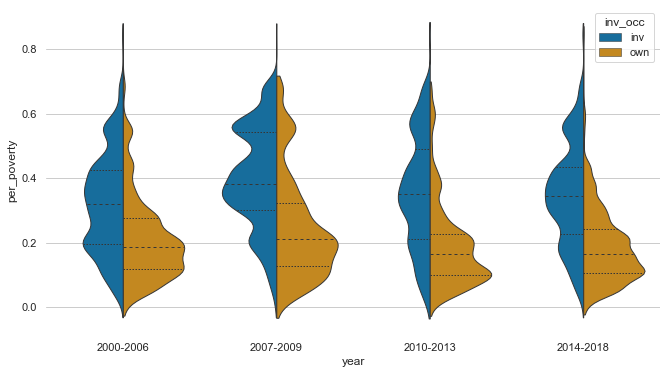

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_poverty',hue='inv_occ',data=violin0018_grouped_years_inv_occ,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inv_own_per_poverty.svg')

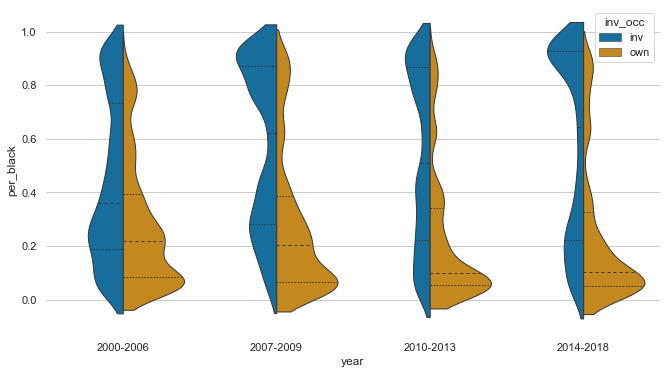

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_black',hue='inv_occ',data=violin0018_grouped_years_inv_occ,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inv_own_per_black.svg')

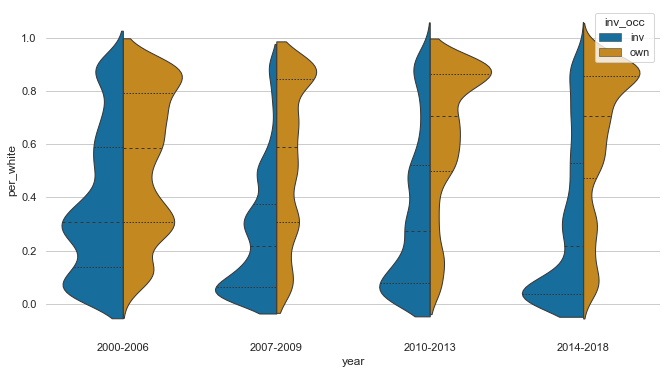

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_white',hue='inv_occ',data=violin0018_grouped_years_inv_occ,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inv_own_per_white.svg')

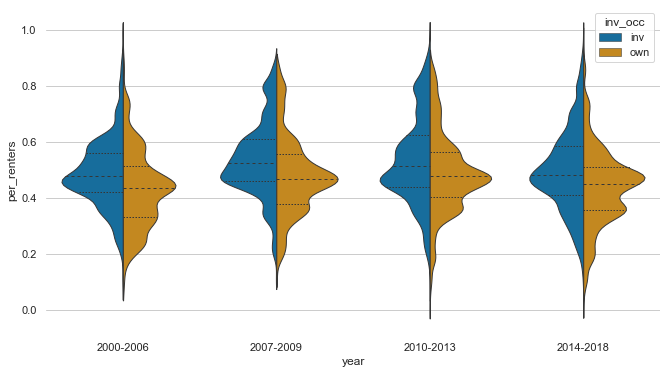

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_renters',hue='inv_occ',data=violin0018_grouped_years_inv_occ,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inv_own_per_renters.svg')

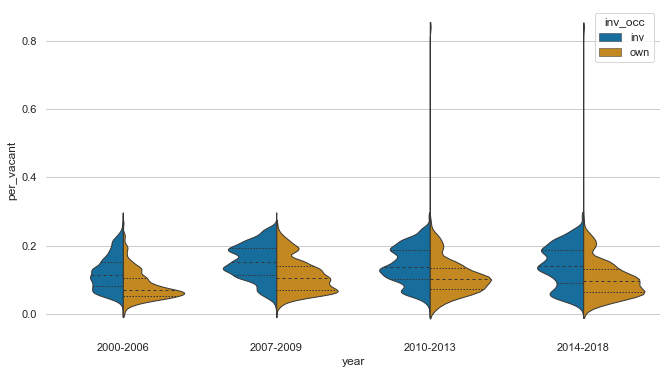

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_vacant',hue='inv_occ',data=violin0018_grouped_years_inv_occ,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inv_own_per_vacant.svg')

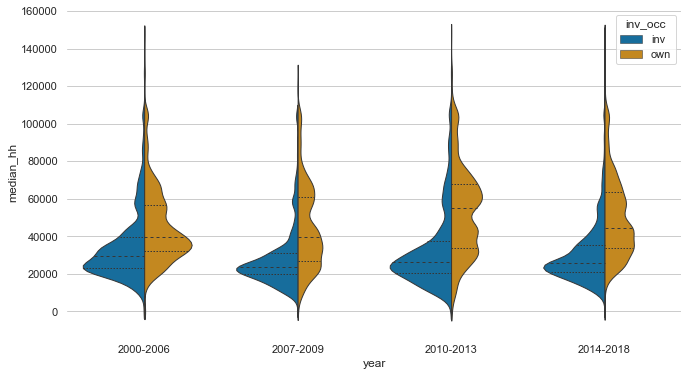

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='median_hh',hue='inv_occ',data=violin0018_grouped_years_inv_occ,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inv_own_median_hh.svg')

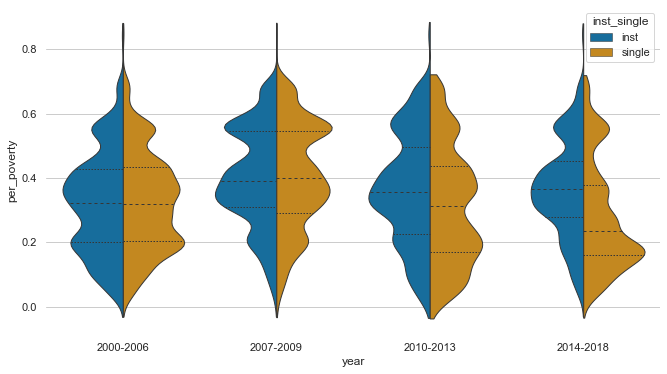

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_poverty',hue='inst_single',data=violin0018_grouped_years_inst_single,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inst_single_per_poverty.svg')

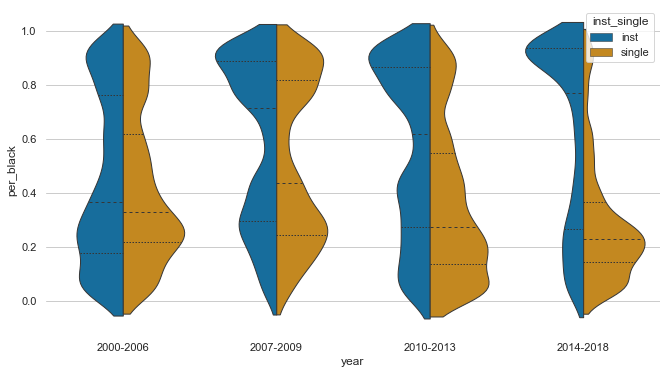

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_black',hue='inst_single',data=violin0018_grouped_years_inst_single,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inst_single_per_black.svg')

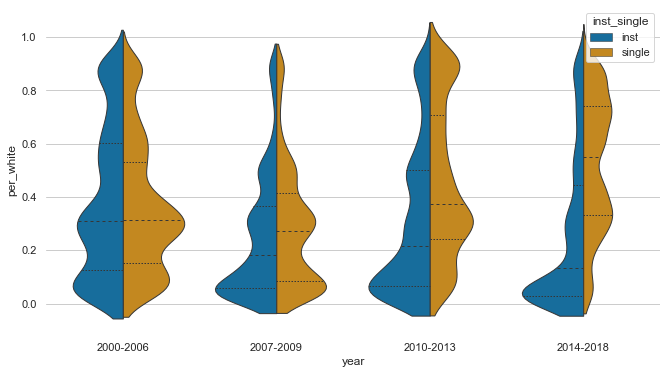

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_white',hue='inst_single',data=violin0018_grouped_years_inst_single,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inst_single_per_white.svg')

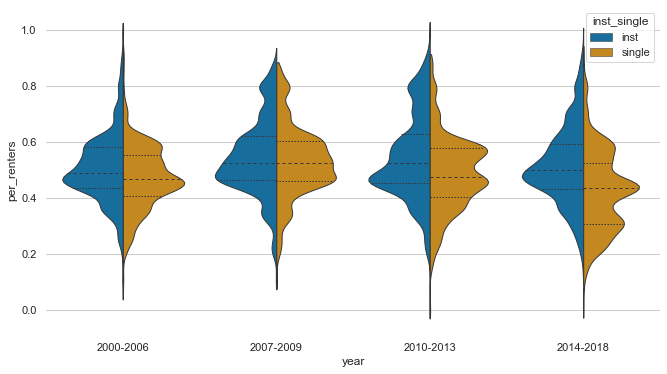

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_renters',hue='inst_single',data=violin0018_grouped_years_inst_single,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')

# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inst_single_per_renters.svg')

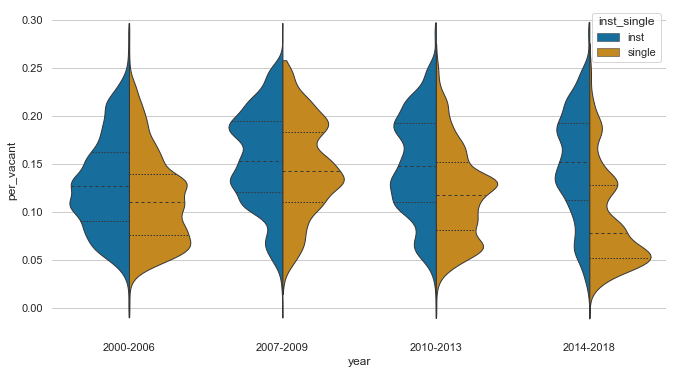

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_vacant',hue='inst_single',data=violin0018_grouped_years_inst_single,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inst_single_per_vacant.svg')

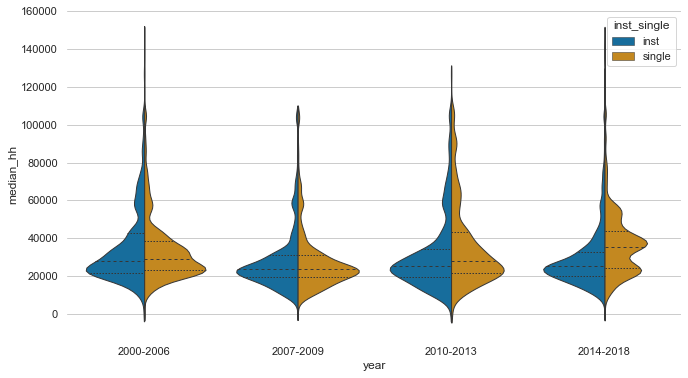

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='median_hh',hue='inst_single',data=violin0018_grouped_years_inst_single,split=True,  bw=.2, cut=1,palette = 'colorblind',linewidth=1,inner="quart", font = 'Helvetica')
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)
plt.savefig('final_svg/violin_inst_single_median_hh.svg')